In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [4]:
df = pd.read_csv("../../haberman-clustering.csv")

In [5]:
df.head()

,Age,Op_year,axil_nodes
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10


In [6]:
df.shape

(305, 3)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,305.0,52.531148,10.744024,30.0,44.0,52.0,61.0,83.0
Op_year,305.0,62.849180,3.254078,58.0,60.0,63.0,66.0,69.0
axil_nodes,305.0,4.036066,7.199370,0.0,0.0,1.0,4.0,52.0


In [8]:
scaler = StandardScaler()

In [9]:
scaled_df = scaler.fit_transform(df)

In [10]:
model = Birch()

In [11]:
cluster_labels = model.fit_predict(scaled_df)

In [12]:
df['labels'] = cluster_labels
pred = cluster_labels

In [13]:
df.head()

,Age,Op_year,axil_nodes,labels
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0


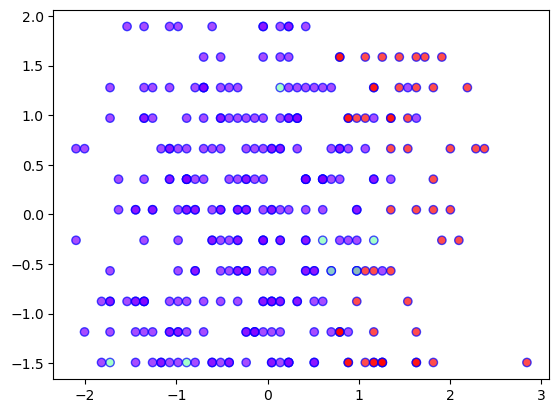

In [14]:
dataset = scaled_df
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [15]:
print(F"Silhoutte Scores : {silhouette_score(scaled_df,cluster_labels)} ")
print(F"Davies Bouldin Scores : {davies_bouldin_score(scaled_df,cluster_labels)} ")
print(F"Calinski Harabasz Scores : {calinski_harabasz_score(scaled_df,cluster_labels)} ")

Silhoutte Scores : 0.22995844530488083 
Davies Bouldin Scores : 1.1893171466227894 
Calinski Harabasz Scores : 64.82961790261285 
